# Prática 05 - Utilização de Comitês de Classificadores

## Descrição: Atividade em grupo que visa a utilização de Comitês de Classificadores (Bagging, Boosting, Random Forest, Voting e Stacking).

### Autores: Mariana Emerenciano Miranda, Arthur Ferreira de Holanda, Artur Revoredo Pinto

#Introdução

Visando exercitar os conceitos aprendidos nas aulas de comitês de classificadores, o aluno deve implementar 5 métodos de comitês de classificadores na melhor base de dados (no nosso caso, CNN_VGG16_256_avg): Bagging, Boosting, Random Forest, Voting e Stacking.


# Descrição da atividade

Os seguintes métodos de comitês foram implementados e analisados:

### **Bagging**
- Utilizado via `sklearn.ensemble.BaggingClassifier` para criar duas tabelas:
  - **Tabela 1:** Bagging Padrão.
  - **Tabela 2:** Bagging com Seleção de Atributos (`max_features=0.5`).

**Procedimento:**
1. Fixar o parâmetro `estimator` para:
   - `DecisionTreeClassifier` (melhor configuração).
   - `KNeighborsClassifier`.
   - `GaussianNB`.
   - `MLPClassifier`.
2. Variar `n_estimators` entre **10**, **20**, e **30**.
3. Comparar as médias de acurácia dos classificadores e analisar o impacto da seleção de atributos.

---

### **Boosting**
- Utilizado via `sklearn.ensemble.AdaBoostClassifier`.
- Uma única tabela foi criada com as seguintes configurações:
  1. Fixar `estimator` para:
     - `DecisionTreeClassifier` (melhor configuração).
     - `GaussianNB`.
  2. Variar `n_estimators` entre **10**, **20**, e **30**.
- A tabela foi comparada com o **Bagging Padrão** para determinar qual método apresentou maior acurácia.

---

### **Random Forest**
- Utilizado via `sklearn.ensemble.RandomForestClassifier`.
- Tabela única gerada com as configurações:
  1. Fixar `criterion` para:
     - `gini`.
     - `entropy`.
     - `log_loss`.
  2. Variar `n_estimators` entre **10**, **20**, **30**, e **100**.
- Comparação dos resultados com os métodos **Bagging** e **Boosting** para identificar o comitê mais eficiente.

---

### **Stacking**
- Utilizado via `sklearn.ensemble.StackingClassifier`.

**Configurações:**
- Teste de tamanhos com **5**, **10**, **15**, e **20** classificadores base.
- Algoritmos incluídos: **MLP**, **k-NN**, **Decision Tree**, e **Naive Bayes**.
- Evitou-se configurações complexas do **MLP** para otimizar o tempo de execução.
- Comparação dos resultados com **Bagging**, **Boosting** e **Random Forest** para determinar o melhor desempenho.

---

### **Voting**
- Utilizado via `sklearn.ensemble.VotingClassifier`.

**Configurações:**
- Teste de tamanhos com **5**, **10**, **15**, e **20** classificadores base.
- Algoritmos incluídos: **MLP**, **k-NN**, **Decision Tree**, e **Naive Bayes**.
- Comparação dos resultados com os demais comitês para determinar a melhor estratégia.

---

# Execução

## Bagging

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.exceptions import ConvergenceWarning
import warnings

# Ignorar warnings para convergência
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Carregando o dataset
data = pd.read_csv("cnn_VGG16_avg_256.csv")
X, y = X, y = data.iloc[:, :-1], data.iloc[:, -1]

# Configurações iniciais
n_estimators_list = [10, 20, 30]
classifiers = {
    "AD": DecisionTreeClassifier(),
    "k-NN": KNeighborsClassifier(),
    "NB": GaussianNB(),
    "MLP": MLPClassifier(max_iter=300),
}

# Função para calcular acurácias
def calculate_bagging_accuracies(max_features=1.0):  # Valor padrão corrigido
    results = {}
    for name, clf in classifiers.items():
        accuracies = []
        for n in n_estimators_list:
            # Configurar parâmetros do BaggingClassifier
            bagging = BaggingClassifier(
                estimator=clf,
                n_estimators=n,
                max_features=max_features,  # Garantir que um valor válido seja usado
                random_state=42,
            )
            acc = cross_val_score(bagging, X, y, cv=5, scoring="accuracy").mean()
            accuracies.append(acc)
        results[name] = accuracies
        print(f"{name} e {clf} concluído e resultado atual é")
        print(results)
    return results

# Calcular acurácias
bagging_standard = calculate_bagging_accuracies(max_features=1.0)  # Usar todas as features
bagging_feature_selection = calculate_bagging_accuracies(max_features=0.5)  # Usar 50% das features

# Exibir resultados
print("Bagging Padrão:")
for name, acc in bagging_standard.items():
    print(f"{name}: {acc}, Média: {np.mean(acc)}")

print("\nBagging com Feature Selection (max_features=0.5):")
for name, acc in bagging_feature_selection.items():
    print(f"{name}: {acc}, Média: {np.mean(acc)}")


## Boosting

In [ ]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.exceptions import ConvergenceWarning
import warnings

# Ignorar warnings para convergência
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Carregando o dataset
data = pd.read_csv("cnn_VGG16_avg_256.csv")
X, y = data.data, data.target

# Configurações iniciais
n_estimators_list = [10, 20, 30]
classifiers = {
    "AD": DecisionTreeClassifier(),
    "NB": GaussianNB(),
}

# Função para calcular acurácias para Boosting
def calculate_boosting_accuracies():
    results = {}
    for name, clf in classifiers.items():
        accuracies = []
        for n in n_estimators_list:
            # Configurar parâmetros do AdaBoostClassifier
            boosting = AdaBoostClassifier(
                estimator=clf,
                n_estimators=n,
                random_state=42,
            )
            acc = cross_val_score(boosting, X, y, cv=5, scoring="accuracy").mean()
            accuracies.append(acc)
        results[name] = accuracies
    return results

# Calcular acurácias para o Boosting
boosting_standard = calculate_boosting_accuracies()

# Exibir resultados do Boosting
print("Boosting Padrão:")
for name, acc in boosting_standard.items():
    print(f"{name}: {acc}, Média: {np.mean(acc)}")


## Random Forest

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Carregando o dataset
data = pd.read_csv("cnn_VGG16_avg_256.csv")
X, y = data.data, data.target

# Configurações iniciais
n_estimators_list = [10, 20, 30, 100]
criteria = ["gini", "entropy", "log_loss"]

# Função para calcular as acurácias do Random Forest
def calculate_rf_accuracies():
    results = {}
    for criterion in criteria:
        accuracies = []
        for n in n_estimators_list:
            rf = RandomForestClassifier(
                n_estimators=n,
                criterion=criterion,
                random_state=42
            )
            acc = cross_val_score(rf, X, y, cv=5, scoring="accuracy").mean()
            accuracies.append(acc)
        results[criterion] = {
            "acurácias": accuracies,
            "média(acc tam)": np.mean(accuracies)
        }
    return results

# Calcular acurácias para Random Forest
rf_results = calculate_rf_accuracies()

# Exibir os resultados
for criterion, data in rf_results.items():
    print(f"\nCritério: {criterion}")
    for i, n in enumerate(n_estimators_list):
        print(f"n_estimators={n}: {data['acurácias'][i]:.4f}")
    print(f"Média(Acc TAM): {data['média(acc tam)']:.4f}")

# Média geral entre classificadores (critérios)
media_acc_classificadores = np.mean([data["média(acc tam)"] for data in rf_results.values()])
print(f"\nMédia geral entre os critérios (Acc Classificadores): {media_acc_classificadores:.4f}")


## Voting

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

# Carregando o dataset
data = pd.read_csv("cnn_VGG16_avg_256.csv")
#X, y = data.data, data.target
X, y = data.iloc[:, :-1], data.iloc[:,-1]

# Configurações iniciais
n_estimators_list = [5, 10, 15, 20]
classifiers = {
    "MLP": MLPClassifier(),
    "k-NN": KNeighborsClassifier(),
    "NB": GaussianNB(),
}

# Função para calcular acurácias para Voting Classifier
def calculate_voting_accuracies():
    results = {}
    for name, clf in classifiers.items():
        accuracies = []
        for n in n_estimators_list:
            # Configurar o VotingClassifier com hard voting
            voting = VotingClassifier(
                estimators=[(name, clf)],
                voting='hard',  # Votação simples baseada na classe mais comum
            )
            acc = cross_val_score(voting, X, y, cv=5, scoring="accuracy").mean()
            accuracies.append(acc)
        results[name] = accuracies
    return results

# Calcular acurácias para o Voting Classifier
voting_standard = calculate_voting_accuracies()

# Exibir resultados do Voting
print("Voting Padrão:")
for name, acc in voting_standard.items():
    print(f"{name}: {acc}, Média: {np.mean(acc)}")


## Stacking

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score


# Carregando o dataset
data = pd.read_csv("cnn_VGG16_avg_256.csv")
#X, y = data.data, data.target
X, y = data.iloc[:, :-1], data.iloc[:,-1]

# Pool de classificadores
classifiers_pool = [
    ('mlp', MLPClassifier(max_iter=200, hidden_layer_sizes=(10,))),
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('nb', GaussianNB()),
]

# Meta-classificador
meta_classifier = KNeighborsClassifier()

# Função para gerar classificadores com repetição circular e nomes únicos
def generate_classifiers_combinations(n):
    expanded_classifiers = []
    for i in range(n):
        base_classifier = classifiers_pool[i % len(classifiers_pool)]
        # Criar nome único para cada classificador
        classifier_name = f"{base_classifier[0]}_{i+1}"
        expanded_classifiers.append((classifier_name, base_classifier[1]))
    return expanded_classifiers

# Função para calcular acurácias do Stacking
def calculate_stacking_accuracies():
    results = []
    n_classifiers_list = [5, 10, 15, 20]  # Quantidade de classificadores base
    for n in n_classifiers_list:
        # Gerar classificadores para o Stacking
        selected_classifiers = generate_classifiers_combinations(n)

        # Configurar o StackingClassifier
        stacking = StackingClassifier(
            estimators=selected_classifiers,
            final_estimator=meta_classifier,
        )

        # Realizar validação cruzada
        cv_results = cross_val_score(stacking, X, y, cv=5, scoring="accuracy")
        mean_accuracy = cv_results.mean()
        detailed_results = {
            "n_classifiers": n,
            "accuracies": cv_results,
            "mean_accuracy": mean_accuracy
        }

        # Adicionar dados do Stacking
        results.append(detailed_results)

        # Detalhar acurácias de cada classificador individualmente
        for classifier_name, classifier in selected_classifiers:
            individual_cv_results = cross_val_score(classifier, X, y, cv=5, scoring="accuracy")
            print(f"Classificador {classifier_name}: Acurácias de validação cruzada: {individual_cv_results}")
            print(f"Classificador {classifier_name}: Acurácia média: {individual_cv_results.mean()}")

    return results

# Calcular as acurácias
stacking_accuracies = calculate_stacking_accuracies()

# Exibir os resultados do Stacking
print("\nResultados do Stacking Classifier:")
for stacking_result in stacking_accuracies:
    print(f"\nNúmero de classificadores base: {stacking_result['n_classifiers']}")
    print(f"Acurácias de validação cruzada: {stacking_result['accuracies']}")
    print(f"Acurácia média: {stacking_result['mean_accuracy']:.4f}")


# Apresentação dos resultados

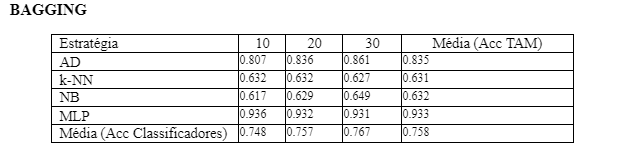

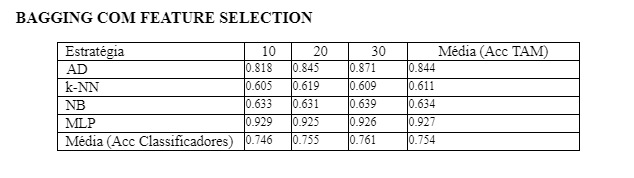

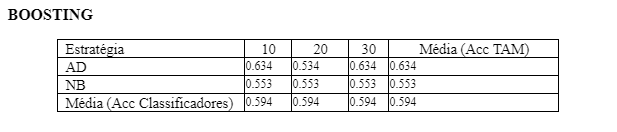

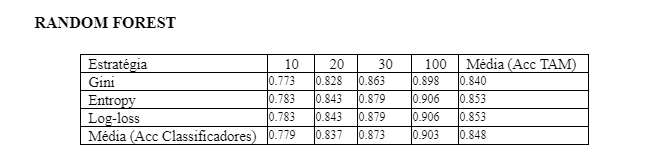

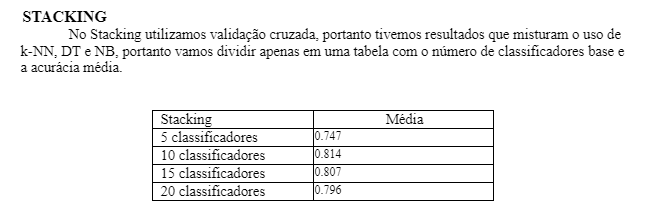

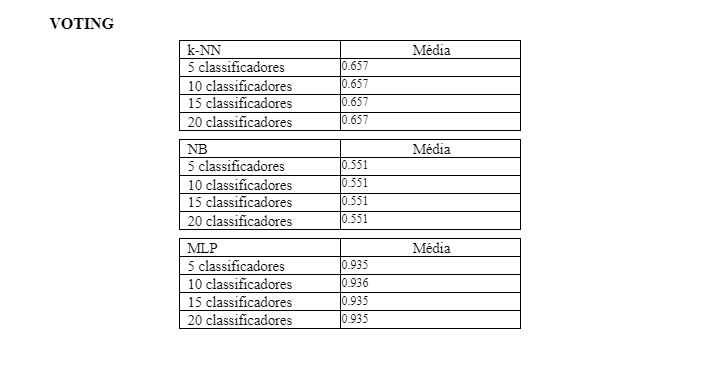